# Usage of Inferential Statistics to analyse NBA salaries

---

## Author:
[__Gleisson Bispo__](https://github.com/gleissonbispo)


## Hypothesis:
In the 2017-2018 season did any NBA player have a **higher** or **lower** salary than the average?


## Dataset:
__[Kaggle: NBA Player Salary Dataset (2017 - 2018)](https://www.kaggle.com/koki25ando/salary)__

---

<img src=https://sportshub.cbsistatic.com/i/r/2018/09/15/f0e813c2-ad7f-453e-855d-097d9f4feed7/thumbnail/770x433/cdf43928ded227cc4f95dd2b8d702116/top100-cover.png width=600>

__<center> Let's go! </center>__

---

## Importing Libraries and Reading Data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV Dataset
df_NBA = pd.read_csv(r'data/NBA_season1718_salary.csv')
df_NBA.head()


,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [3]:
#DF Key information
df_NBA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
Unnamed: 0     573 non-null int64
Player         573 non-null object
Tm             573 non-null object
season17_18    573 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.0+ KB


In [4]:
#Renaming and deleting columns
df_NBA.columns = ['cod', 'player', 'team', 'salary']
del df_NBA['cod']
df_NBA.head()


,player,team,salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


---
## Visualizing players by team

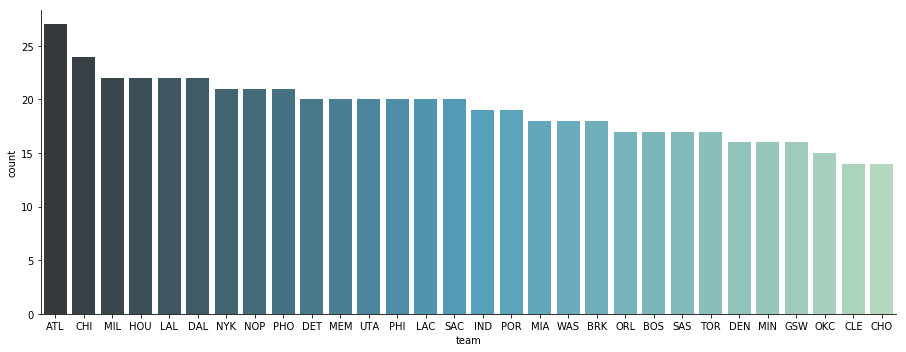

In [5]:
team_index = df_NBA['team'].value_counts()
sns.catplot(data=df_NBA,
            x='team',
            order=team_index.index,
            kind='count',
            aspect=2.5,
            palette='GnBu_d')

## Salary Distribution

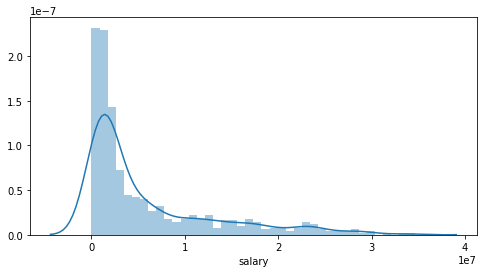

In [6]:
#Histogram and KDE
plt.figure(figsize=(8, 4))
sns.distplot(df_NBA['salary'], bins=40)


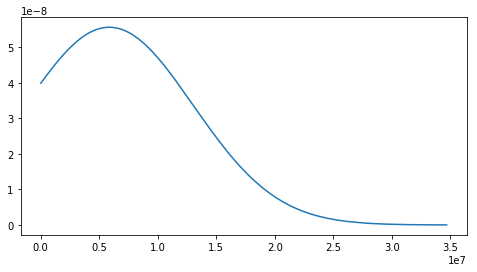

In [7]:
#Probability Density Function (PDF) Chart
x = df_NBA['salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()


_Based on the probability density function plot is possible to identify a normal distibution, however, with a huge bilateral symmetry (right). Using a logarithm function is possible to "correct" it._

## Normalizing the salary data

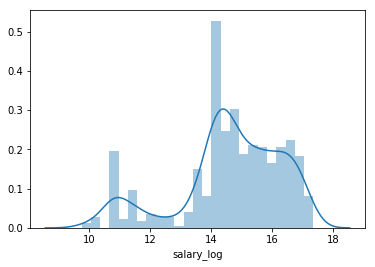

In [8]:
#Creating a column with the salary log to normalize the distribution
df_NBA['salary_log'] = np.log1p(df_NBA['salary'])
sns.distplot(df_NBA['salary_log'], bins=25)


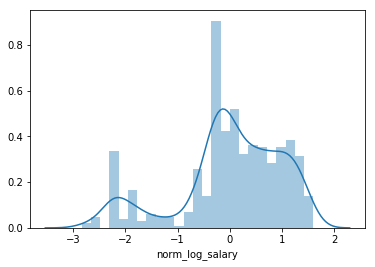

In [9]:
#Dividing by the mean and standard deviation to standardize the serie in a new column
df_NBA['norm_log_salary'] = ((df_NBA['salary_log'] - df_NBA['salary_log'].mean()) / df_NBA['salary_log'].std())
sns.distplot(df_NBA['norm_log_salary'], bins=25)


## Mean and Standard Deviation

In [10]:
print(f"""Mean: {df_NBA.norm_log_salary.mean():.4f}
Standard: {df_NBA.norm_log_salary.std():.4f}""")


Mean: 0.0000
Standard: 1.0000


## P-Value to  2 std

In [65]:
norm_mean = df_NBA.norm_log_salary.mean()
norm_std = df_NBA.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value


0.04550026389635878

## Calculating z-score

In [12]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')


-1.9600 <--------> 1.9600


__With the Alpha limits of 0.95 we can run the inference and find out which players are earning above or below average with a 95% confidence level.__

---

## Analysing Results


## Hypothesis:
In the 2017-2018 season did any NBA player have a **higher** or **lower** salary than the average?


---
### __1. Lower than the average__


In [14]:
#Players
df_NBA_lower = df_NBA[df_NBA['norm_log_salary'] < z_score_inf]
df_NBA_lower


,player,team,salary,salary_log,norm_log_salary
528,Demetrius Jackson,HOU,74159.0,11.213980,-1.988587
529,Georgios Papagiannis,POR,74159.0,11.213980,-1.988587
530,Larry Drew,NOP,74159.0,11.213980,-1.988587
531,Scotty Hopson,DAL,74159.0,11.213980,-1.988587
532,Isaiah Canaan,HOU,53465.0,10.886801,-2.179385
533,Tyler Cavanaugh,ATL,50000.0,10.819798,-2.218459
534,Kyle Collinsworth,DAL,50000.0,10.819798,-2.218459
535,Demetrius Jackson,HOU,50000.0,10.819798,-2.218459
536,Daniel Ochefu,WAS,50000.0,10.819798,-2.218459
537,Michael Young,WAS,50000.0,10.819798,-2.218459


In [21]:
#Players by team
team_index = df_NBA_lower['team'].value_counts()
team_index


HOU    5
DAL    5
LAL    4
ATL    3
NOP    3
UTA    3
MIL    3
DET    2
PHI    2
CHI    2
MEM    2
WAS    2
IND    1
LAC    1
NYK    1
POR    1
CLE    1
MIA    1
TOR    1
BRK    1
ORL    1
Name: team, dtype: int64

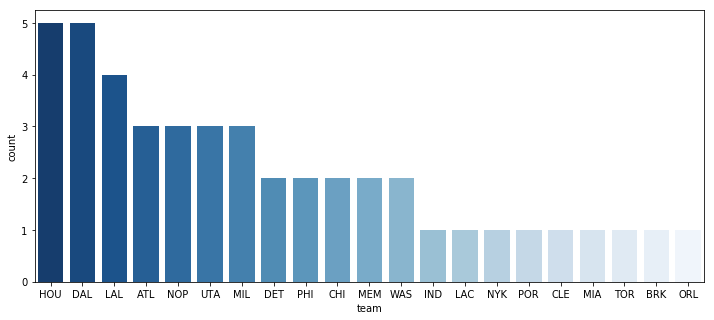

In [53]:
#Plot players by team
plt.figure(figsize=(12, 5))
sns.countplot(df_NBA_lower['team'],
              order=team_index.index,
              palette='Blues_r')


In [54]:
print(f"""Players with a lower salary than the average: 
Total - {df_NBA_lower.shape[0]}
Rate - {df_NBA_lower.shape[0] / df_NBA.shape[0] * 100:.2f}%""")


Players with a lower salary than the average: 
Total - 45
Rate - 7.85%


There are currently __45 players__ earning less than the average salary. This represents a total of __7.85%__.

---

### __2. Higher than the average__


In [50]:
#Players
df_NBA_higher = df_NBA[df_NBA['norm_log_salary'] > z_score_sup]
df_NBA_higher


,player,team,salary,salary_log,norm_log_salary


In [59]:
print(f"""Players with a higher salary than the average: 
Total - {df_NBA_higher.shape[0]}
Rate - {df_NBA_higher.shape[0] / df_NBA.shape[0] * 100:.2f}%""")


Players with a higher salary than the average: 
Total - 0
Rate - 0.00%


In [61]:
#p-value and alpha max to the highest salary
p_value = st.norm(norm_mean, norm_std).sf(df_NBA['norm_log_salary'].max())
alpha = 1 - p_value
print(f'P-value: {p_value:.3f}\nAlpha Max: {alpha:.3f}\nWe can confirm that the highest salary is on the distribution!')


P-value: 0.055
Alpha Max: 0.945
We can confirm that the highest salary is on the distribution!


Currently there are __no__ players earning higher than the average salary. The highest salary is on the average distribution.